Nama: Rafi Ananda Subekti

Cohort ID: MC009D5Y0612

Kelas: MC-52

# **Import Library**

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00


In [2]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [3]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df = pd.read_csv("updated_ulasan_shopeepay.csv")
df.head()

content  score
0  Bagusnya" tetapi tampilan fitur demi fiturnya ...      5
1  baguussss suka suka" lancar sekali, gak berikl...      5
2  Terbagus!!ini aplikasinya, gak ada bug nya, ik...      5
3  suka suka 💓 lancarnya dipake, iklan tidak ada,...      5
4  suka2nya " dipake lancar, gak beriklan, tdk le...      5

##Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [128]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()


def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
slangwords = {"@": "di", 'gak': 'tidak','baguussss': 'bagus', 'ga': 'tidak', 'nggak': 'tidak', 'ngga': 'tidak',
    'bgt': 'banget', 'parahh': 'parah',
    'klo': 'kalau', 'klu': 'kalau', 'kl': 'kalau',
    'udh': 'sudah', 'uda': 'sudah', 'udh': 'sudah',
    'dpt': 'dapat', 'dapet': 'dapat',
    'sm': 'sama', 'smn': 'sama', 'sma': 'sama',
    'aja': 'saja', 'aj': 'saja', 'ajaaa': 'saja',
    'tp': 'tapi', 'tpi': 'tapi',
    'dr': 'dari', 'drh': 'darah',
    'yg': 'yang', 'yng': 'yang', 'y': 'yang',
    'blm': 'belum', 'blum': 'belum',
    'tdk': 'tidak', 'tkn': 'tidak', 'gaada': 'tidak ada',
    'dgn': 'dengan', 'dngn': 'dengan',
    'trs': 'terus', 'trus': 'terus',
    'krn': 'karena',
    'sy': 'saya', 'gue': 'saya', 'gw': 'saya', 'aq': 'saya', 'q': 'saya',
    'btw': 'ngomong-ngomong', 'wkwk': '', 'hehe': '', 'lol': '', 'wkwwk': '',
    'jd': 'jadi', 'jg': 'juga', 'jga': 'juga',
    'cmn': 'cuma', 'cm': 'cuma', 'cuma2': 'cuma-cuma',
    'ngerti': 'mengerti', 'ngasih': 'memberi', 'ngomong': 'berbicara',
    'ngambil': 'mengambil', 'ngisi': 'mengisi',
    'makasih': 'terima kasih', 'makasi': 'terima kasih',
    'bangettt': 'banget', 'bangett': 'banget', 'bgtt': 'banget',
    'ok': 'oke', 'okee': 'oke', 'okey': 'oke',
    'kecewaaa': 'kecewa', 'kecewaa': 'kecewa',
    'mantapp': 'mantap', 'mantappp': 'mantap', 'mntp': 'mantap',
    'biasaaja': 'biasa saja',
    'cepet': 'cepat', 'cepettt': 'cepat',
    'lemot': 'lambat',
    'gabisa': 'tidak bisa', 'gabisaan': 'tidak bisa',
    'sukaaa': 'suka', 'sukaaaaa': 'suka',
    'bagusss': 'bagus', 'bgs': 'bagus',
    'burukkk': 'buruk', 'jelekkk': 'jelek',
    'lumayanlah': 'lumayan',
    'trs2': 'terus-terusan',
    'cpt': 'cepat',
    'pelan2': 'pelan-pelan',
    'gajelas': 'tidak jelas',
    'gausah': 'tidak usah',
    'gapapa': 'tidak apa-apa',
    'dah': 'sudah',
    'dong': '',
    'yaaa': 'ya'}
def standard_slangwords(text):
    words = text.split()
    standardized_words = []

    for word in words:
        if word.lower() in slangwords:
            standardized_words.append(slangwords[word.lower()])
        else:
            standardized_words.append(word)

    fixed_text = ' '.join(standardized_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [14]:
clean_df = df.copy()

clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(standard_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df.head()

content  score  \
0  Bagusnya" tetapi tampilan fitur demi fiturnya ...      5   
1  baguussss suka suka" lancar sekali, gak berikl...      5   
2  Terbagus!!ini aplikasinya, gak ada bug nya, ik...      5   
3  suka suka 💓 lancarnya dipake, iklan tidak ada,...      5   
4  suka2nya " dipake lancar, gak beriklan, tdk le...      5   

                                          text_clean  \
0  Bagusnya tetapi tampilan fitur demi fiturnya t...   
1  baguussss suka suka lancar sekali gak beriklan...   
2  Terbagusini aplikasinya gak ada bug nya iklan ...   
3  suka suka  lancarnya dipake iklan tidak ada bu...   
4  sukanya  dipake lancar gak beriklan tdk lemot ...   

                                text_casefoldingText  \
0  bagusnya tetapi tampilan fitur demi fiturnya t...   
1  baguussss suka suka lancar sekali gak beriklan...   
2  terbagusini aplikasinya gak ada bug nya iklan ...   
3  suka suka  lancarnya dipake iklan tidak ada bu...   
4  sukanya  dipake lancar gak beriklan tdk lemot ...   

                                     text_slangwords  \
0  bagusnya tetapi tampilan fitur demi fiturnya t...   
1  bagus suka suka lancar sekali tidak beriklan t...   
2  terbagusini aplikasinya tidak ada bug nya ikla...   
3  suka suka lancarnya dipake iklan tidak ada bug...   
4  sukanya dipake lancar tidak beriklan tidak lam...   

                                 text_tokenizingText  \
0  [bagusnya, tetapi, tampilan, fitur, demi, fitu...   
1  [bagus, suka, suka, lancar, sekali, tidak, ber...   
2  [terbagusini, aplikasinya, tidak, ada, bug, ny...   
3  [suka, suka, lancarnya, dipake, iklan, tidak, ...   
4  [sukanya, dipake, lancar, tidak, beriklan, tid...   

                                       text_stopword  
0  [bagusnya, tampilan, fitur, fiturnya, padat, m...  
1  [bagus, suka, suka, lancar, beriklan, lelet, b...  
2  [terbagusini, aplikasinya, bug, iklan, lemotle...  
3  [suka, suka, lancarnya, dipake, iklan, bug, la...  
4  [sukanya, dipake, lancar, beriklan, lambat, bu...

In [17]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [18]:
clean_df["stemmed"] = clean_df["text_stopword"].apply(lambda word: [stemmer.stem(y) for y in word])

In [19]:
clean_df["text_akhir"] = clean_df["stemmed"].apply(lambda x: " ".join([item for item in x]))
clean_df['text_akhir'] = clean_df['text_akhir'].astype('str')
clean_df['text_akhir']= clean_df['text_akhir'].astype(pd.StringDtype())
clean_df.head()

content  score  \
0  Bagusnya" tetapi tampilan fitur demi fiturnya ...      5   
1  baguussss suka suka" lancar sekali, gak berikl...      5   
2  Terbagus!!ini aplikasinya, gak ada bug nya, ik...      5   
3  suka suka 💓 lancarnya dipake, iklan tidak ada,...      5   
4  suka2nya " dipake lancar, gak beriklan, tdk le...      5   

                                          text_clean  \
0  Bagusnya tetapi tampilan fitur demi fiturnya t...   
1  baguussss suka suka lancar sekali gak beriklan...   
2  Terbagusini aplikasinya gak ada bug nya iklan ...   
3  suka suka  lancarnya dipake iklan tidak ada bu...   
4  sukanya  dipake lancar gak beriklan tdk lemot ...   

                                text_casefoldingText  \
0  bagusnya tetapi tampilan fitur demi fiturnya t...   
1  baguussss suka suka lancar sekali gak beriklan...   
2  terbagusini aplikasinya gak ada bug nya iklan ...   
3  suka suka  lancarnya dipake iklan tidak ada bu...   
4  sukanya  dipake lancar gak beriklan tdk lemot ...   

                                     text_slangwords  \
0  bagusnya tetapi tampilan fitur demi fiturnya t...   
1  bagus suka suka lancar sekali tidak beriklan t...   
2  terbagusini aplikasinya tidak ada bug nya ikla...   
3  suka suka lancarnya dipake iklan tidak ada bug...   
4  sukanya dipake lancar tidak beriklan tidak lam...   

                                 text_tokenizingText  \
0  [bagusnya, tetapi, tampilan, fitur, demi, fitu...   
1  [bagus, suka, suka, lancar, sekali, tidak, ber...   
2  [terbagusini, aplikasinya, tidak, ada, bug, ny...   
3  [suka, suka, lancarnya, dipake, iklan, tidak, ...   
4  [sukanya, dipake, lancar, tidak, beriklan, tid...   

                                       text_stopword  \
0  [bagusnya, tampilan, fitur, fiturnya, padat, m...   
1  [bagus, suka, suka, lancar, beriklan, lelet, b...   
2  [terbagusini, aplikasinya, bug, iklan, lemotle...   
3  [suka, suka, lancarnya, dipake, iklan, bug, la...   
4  [sukanya, dipake, lancar, beriklan, lambat, bu...   

                                             stemmed  \
0  [bagus, tampil, fitur, fiturnya, padat, erti, ...   
1  [bagus, suka, suka, lancar, iklan, lelet, bug,...   
2  [terbagusini, aplikasi, bug, iklan, lemotlemot...   
3  [suka, suka, lancar, dipake, iklan, bug, lamba...   
4  [suka, dipake, lancar, iklan, lambat, bug, nya...   

                                          text_akhir  
0  bagus tampil fitur fiturnya padat erti fungsi ...  
1  bagus suka suka lancar iklan lelet bug lancar ...  
2  terbagusini aplikasi bug iklan lemotlemot coco...  
3  suka suka lancar dipake iklan bug lambat nyama...  
4  suka dipake lancar iklan lambat bug nyaman tra...

##**Pelabelan**

In [20]:
import csv
import requests
from io import StringIO

lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

**Fungsi untuk menentukan polaritas sentimen**

In [26]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score = score + lexicon_positive[word]
    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]
    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [27]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    15907
negative     9640
neutral      8515
Name: count, dtype: int64


#**Visualisasi Data**

**Visualisasi Pie Chart**

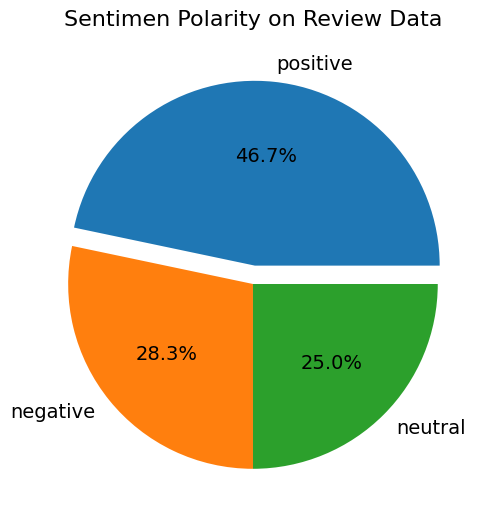

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]

labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

ax.set_title('Sentimen Polarity on Review Data', fontsize=16, pad=20)

plt.show()

**Positive**

In [30]:
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']

positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

positive_tweets = positive_tweets.reset_index(drop=True)

positive_tweets.index += 1

**Negative**

In [31]:
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']

negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

negative_tweets = negative_tweets[0:10]

negative_tweets = negative_tweets.reset_index(drop=True)

negative_tweets.index += 1

In [36]:
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

neutral_tweets = neutral_tweets[0:10]

neutral_tweets = neutral_tweets.reset_index(drop=True)

neutral_tweets.index += 1

#**Visualisasi Word Cloud Shopeepay**

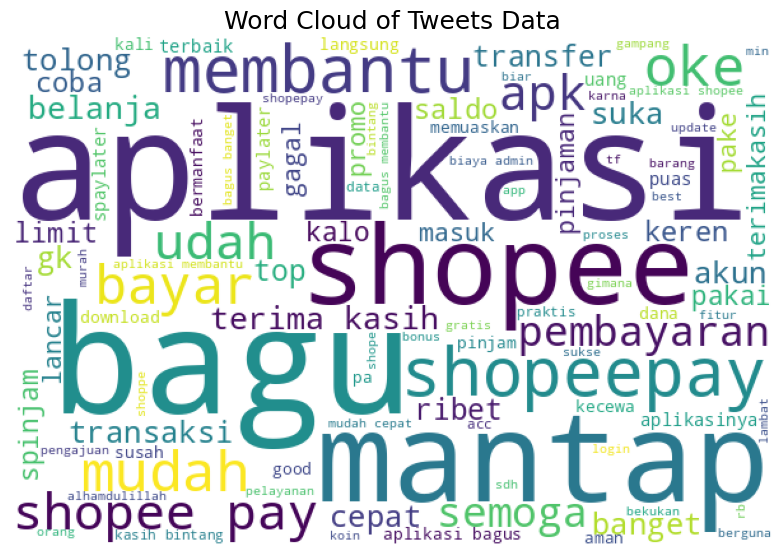

In [37]:
list_words = ''

for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

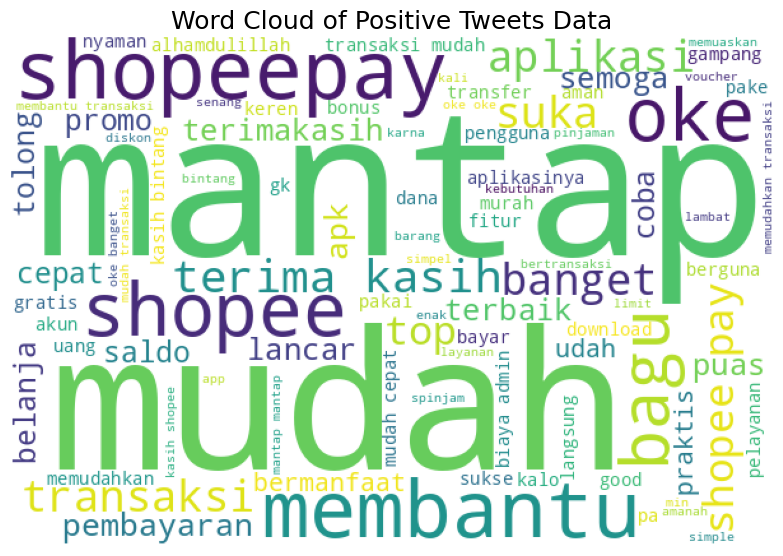

In [38]:
list_words = ''

for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

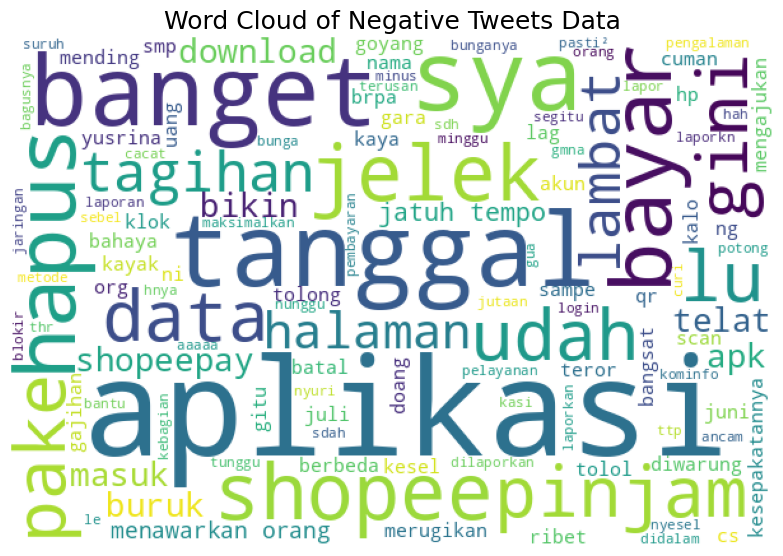

In [39]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

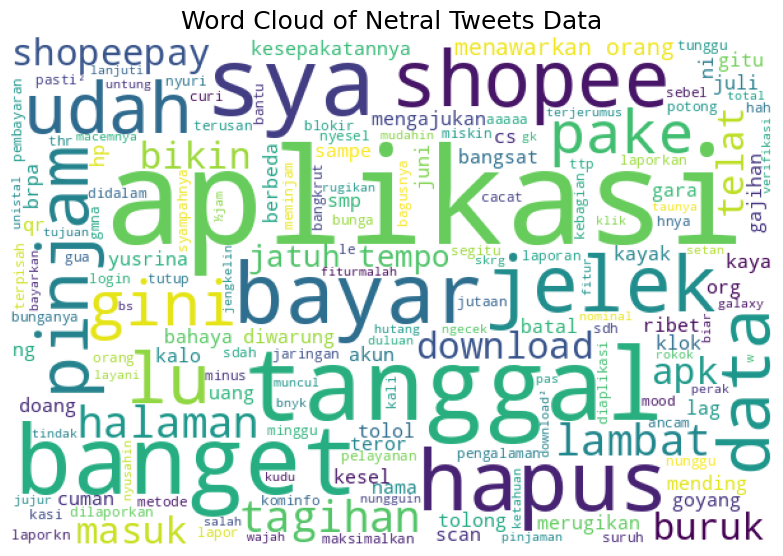

In [40]:
list_words = ''

for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Netral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

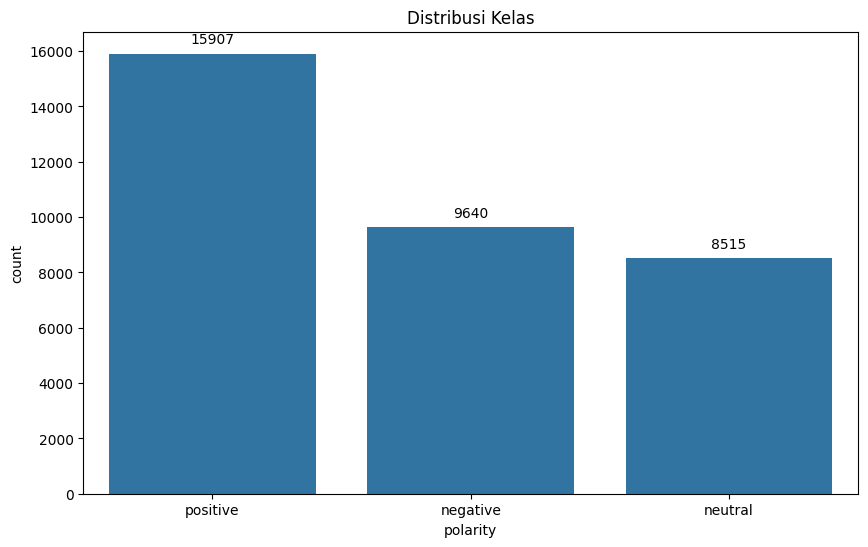

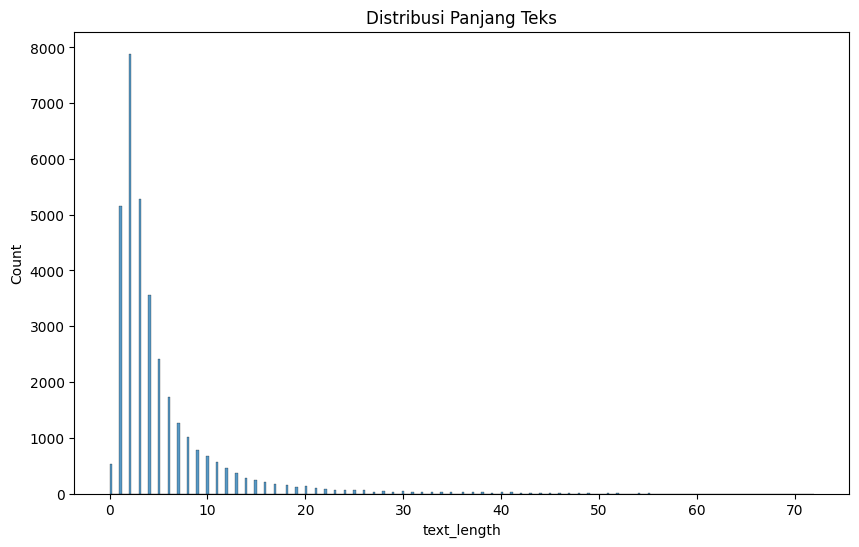

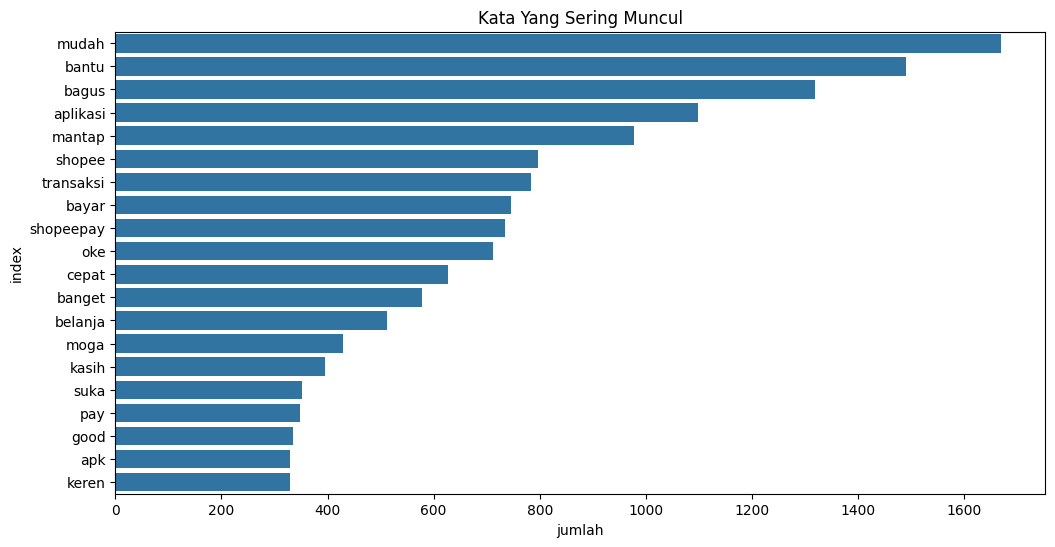

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()
plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Yang Sering Muncul')
plt.show()

## **Data Splitting**

In [42]:
clean_df.head(2)

content  \
0  Bagusnya" tetapi tampilan fitur demi fiturnya terlalu padat sehingga banyak yg belum mengerti fungsinya di luar transfer dan bayar tagihan.Tuk menu menu ini pengguanaannya cukup gampang, dan sekarang makin top banget tdk pernah ada erorr,, transaksi sukses hanya dlm hitungan detik aja, mengakses nya jg lancar jaya gak.klan, bug, dan lemot. Aplnya jg cukup sederhana paling bagus buat transaksi transfer ke smua bank karna bebas biaya admin, jd paling oke di gunakan untuk mitra usaha atau pribadi.   
1   baguussss suka suka" lancar sekali, gak beriklan, gak lelet & bug sehingga lancar bertransaksi dan menjelajahi setiap detail dari menu"nya. Walupun sayang juga sih ada sebahagian fitur-menu tsb belum terlalu dipahami / kegunaannya fungsi dan maksudnya, cuman ada beberapa dr fitur fitur yg dominan di gunain dan hampir setiap saat memakainya, seperti waktu mengisi token, membayar tagihan, transfer, harga lumayan murah, saat transfer ke smua bank3, tanpa biaya admin bisa kmu nikmati hanya di sini   

   score  \
0      5   
1      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                text_clean  \
0  Bagusnya tetapi tampilan fitur demi fiturnya terlalu padat sehingga banyak yg belum mengerti fungsinya di luar transfer dan bayar tagihanTuk menu menu ini pengguanaannya cukup gampang dan sekarang makin top banget tdk pernah ada erorr transaksi sukses hanya dlm hitungan detik aja mengakses nya jg lancar jaya gakklan bug dan lemot Aplnya jg cukup sederhana paling bagus buat transaksi transfer ke smua bank karna bebas biaya admin jd paling oke di gunakan untuk mitra usaha atau pribadi   
1       baguussss suka suka lancar sekali gak beriklan gak lelet  bug sehingga lancar bertransaksi dan menjelajahi setiap detail dari menunya Walupun sayang juga sih ada sebahagian fiturmenu tsb belum terlalu dipahami  kegunaannya fungsi dan maksudnya cuman ada beberapa dr fitur fitur yg dominan di gunain dan hampir setiap saat memakainya seperti waktu mengisi token membayar tagihan transfer harga lumayan murah saat transfer ke smua bank tanpa biaya admin bisa kmu nikmati hanya di sini   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text_casefoldingText  \
0  bagusnya tetapi tampilan fitur demi fiturnya terlalu padat sehingga banyak yg belum mengerti fungsinya di luar transfer dan bayar tagihantuk menu menu ini pengguanaannya cukup gampang dan sekarang makin top banget tdk pernah ada erorr transaksi sukses hanya dlm hitungan detik aja mengakses nya jg lancar jaya gakklan bug dan lemot aplnya jg cukup sederhana paling bagus buat transaksi transfer ke smua bank karna bebas biaya admin jd paling oke di gunakan untuk mitra usaha atau pribadi   
1       baguussss suka suka lancar sekali gak beriklan gak lelet  bug sehingga lancar bertransaksi dan menjelajahi setiap detail dari menunya walupun sayang juga sih ada sebahagian fiturmenu tsb belum terlalu dipahami  kegunaannya fungsi dan maksudnya cuman ada beberapa dr fitur fitur yg dominan di gunain dan hampir setiap saat memakainya seperti waktu mengisi token membayar tagihan transfer harga lumayan murah saat transfer ke smua bank tanpa biaya admin bisa kmu

In [43]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [44]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [45]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

acc    admin  aju     aktif  akun  alhamdulillah  aman  amanah  aneh  \
0      0.0  0.18757  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
1      0.0  0.17915  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
2      0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
3      0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
4      0.0  0.00000  0.0  0.213759   0.0            0.0   0.0     0.0   0.0   
...    ...      ...  ...       ...   ...            ...   ...     ...   ...   
34057  0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
34058  0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
34059  0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
34060  0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   
34061  0.0  0.00000  0.0  0.000000   0.0            0.0   0.0     0.0   0.0   

       apa  ...  tuju  tunggu  uang  udah  untung  update     usaha  utk  \
0      0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.223519  0.0   
1      0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
2      0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
3      0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
4      0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
...    ...  ...   ...     ...   ...   ...     ...     ...       ...  ...   
34057  0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
34058  0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
34059  0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
34060  0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   
34061  0.0  ...   0.0     0.0   0.0   0.0     0.0     0.0  0.000000  0.0   

       verifikasi  voucher  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      0.0  
3             0.0      0.0  
4             0.0      0.0  
...           ...      ...  
34057         0.0      0.0  
34058         0.0      0.0  
34059         0.0      0.0  
34060         0.0      0.0  
34061         0.0      0.0  

[34062 rows x 200 columns]

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
X_vectorized = vectorizer.fit_transform(X)

In [108]:
model_train_acc = pd.DataFrame(columns=['Accuracy'])
model_test_acc = pd.DataFrame(columns=['Accuracy'])

In [109]:
X_train8, X_test2, y_train8, y_test2 = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
X_train7, X_test3, y_train7, y_test3 = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

## **Pembuat Model**

In [110]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

## **Random Forest**

**Random Forest (80% dan 20%)**

In [111]:
from sklearn.ensemble import RandomForestClassifier

random_forest_80 = RandomForestClassifier()

random_forest_80.fit(X_train8, y_train8)

rf_pred_train8 = random_forest_80.predict(X_train8)
rf_pred_test2 = random_forest_80.predict(X_test2)

rf_acc_train8 = accuracy_score(y_train8, rf_pred_train8)
rf_acc_test2 = accuracy_score(y_test2, rf_pred_test2)

model_train_acc.loc['Random Forest - Latih 80%'] = rf_acc_train8
model_test_acc.loc['Random Forest - Uji 20%'] = rf_acc_test2

print('Random Forest 80% - accuracy_train:', rf_acc_train8)
print('Random Forest 20% - accuracy_test:', rf_acc_test2)

Random Forest 80% - accuracy_train: 0.986825204594664
Random Forest 20% - accuracy_test: 0.8583590195215031


**Random Forest (70% dan 30%)**

In [112]:
random_forest_70 = RandomForestClassifier()

random_forest_70.fit(X_train7, y_train7)

rf_pred_train7 = random_forest_70.predict(X_train7)
rf_pred_test3 = random_forest_70.predict(X_test3)

rf_acc_train7 = accuracy_score(y_train7, rf_pred_train7)
rf_acc_test3 = accuracy_score(y_test3, rf_pred_test3)

model_train_acc.loc['Random Forest - Latih 70%'] = rf_acc_train7
model_test_acc.loc['Random Forest - Uji 30%'] = rf_acc_test3

print('Random Forest 70% - accuracy_train:', rf_acc_train7)
print('Random Forest 30% - accuracy_test:', rf_acc_test3)

Random Forest 70% - accuracy_train: 0.9869982804177326
Random Forest 30% - accuracy_test: 0.8532146002544281


##**Naive Bayes**

**Naive Bayes (80% dan 20%)**

In [113]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes_80 = BernoulliNB()

naive_bayes_80.fit(X_train8, y_train8)

nb_pred_train8 = naive_bayes_80.predict(X_train8)
nb_pred_test2 = naive_bayes_80.predict(X_test2)

nb_acc_train8 = accuracy_score(nb_pred_train8, y_train8)
nb_acc_test2 = accuracy_score(nb_pred_test2, y_test2)

model_train_acc.loc['Naive Bayes - Latih 80%'] = nb_acc_train8
model_test_acc.loc['Naive Bayes -  20%'] = nb_acc_test2

# Menampilkan akurasi
print('Naive Bayes 80% - accuracy_train:', nb_acc_train8)
print('Naive Bayes 20% - accuracy_test:', nb_acc_test2)

Naive Bayes 80% - accuracy_train: 0.7761018752981761
Naive Bayes 20% - accuracy_test: 0.7335975341259358


**Naive Bayes (70% dan 30%)**

In [114]:
naive_bayes_70 = BernoulliNB()

naive_bayes_70.fit(X_train7, y_train7)

nb_pred_train7 = naive_bayes_70.predict(X_train7)
nb_pred_test3 = naive_bayes_70.predict(X_test3)

nb_acc_train7 = accuracy_score(nb_pred_train7, y_train7)
nb_acc_test3 = accuracy_score(nb_pred_test3, y_test3)

model_train_acc.loc['Naive Bayes - Latih 70%'] = nb_acc_train7
model_test_acc.loc['Naive Bayes - Uji 30%'] = nb_acc_test3

# Menampilkan akurasi
print('Naive Bayes 70% - accuracy_train:', nb_acc_train8)
print('Naive Bayes 30% - accuracy_test:', nb_acc_test3)

Naive Bayes 70% - accuracy_train: 0.7761018752981761
Naive Bayes 30% - accuracy_test: 0.7250220178099618


## **Logistic Regression**

**Logistic Regression (80% dan 20%)**

In [115]:
from sklearn.linear_model import LogisticRegression


logistic_regression_80 = LogisticRegression()


logistic_regression_80.fit(X_train8, y_train8)

lr_y_pred_train8 = logistic_regression_80.predict(X_train8)
lr_y_pred_test2 = logistic_regression_80.predict(X_test2)

lr_acc_train8 = accuracy_score(lr_y_pred_train8, y_train8)

lr_acc_test2 = accuracy_score(lr_y_pred_test2, y_test2)

model_train_acc.loc['Logistic Regression - Latih 80%'] = lr_acc_train8
model_test_acc.loc['Logistic Regression - Uji 20%'] = lr_acc_test2

print('Logistic Regression - accuracy_train:', lr_acc_train8)
print('Logistic Regression - accuracy_test:', lr_acc_test2)

Logistic Regression - accuracy_train: 0.9196300781680061
Logistic Regression - accuracy_test: 0.8624688096286511


**Logistic Regression (70% dan 30%)**

In [116]:
logistic_regression_70 = LogisticRegression()


logistic_regression_70.fit(X_train7, y_train7)

lr_y_pred_train7 = logistic_regression_70.predict(X_train7)
lr_y_pred_test3 = logistic_regression_70.predict(X_test3)

lr_acc_train7 = accuracy_score(lr_y_pred_train7, y_train7)

lr_acc_test3 = accuracy_score(lr_y_pred_test3, y_test3)

model_train_acc.loc['Logistic Regression - Latih 70%'] = lr_acc_train7
model_test_acc.loc['Logistic Regression - Uji 30%'] = lr_acc_test3

print('Logistic Regression - accuracy_train:', lr_acc_train7)
print('Logistic Regression - accuracy_test:', lr_acc_test3)

Logistic Regression - accuracy_train: 0.9221574466300382
Logistic Regression - accuracy_test: 0.8576181622467952


#**Evaluasi Model**

In [117]:
model_train_acc

Accuracy
Random Forest - Latih 80%        0.986825
Random Forest - Latih 70%        0.986998
Naive Bayes - Latih 80%          0.776102
Naive Bayes - Latih 70%          0.771589
Logistic Regression - Latih 80%  0.919630
Logistic Regression - Latih 70%  0.922157

In [118]:
model_test_acc

Accuracy
Random Forest - Uji 20%        0.858359
Random Forest - Uji 30%        0.853215
Naive Bayes -  20%             0.733598
Naive Bayes - Uji 30%          0.725022
Logistic Regression - Uji 20%  0.862469
Logistic Regression - Uji 30%  0.857618

In [124]:
def analyze_sentiment(text):
    # Langkah 1: Preprocessing teks
    cleaned_text = cleaningText(text)
    lowered_text = casefoldingText(cleaned_text)
    normalized_text = standard_slangwords(lowered_text)
    tokenized_words = tokenizingText(normalized_text)
    filtered_words = filteringText(tokenized_words)
    final_text = toSentence(filtered_words)

    # Langkah 2: Vektorisasi teks
    text_vector = vectorizer.transform([final_text])

    # Langkah 3: Prediksi sentimen
    probabilities = logistic_regression_80.predict_proba(text_vector)[0]

    # Langkah 4: Interpretasi hasil
    sentiment_labels = logistic_regression_80.classes_
    probability_dict = dict(zip(sentiment_labels, probabilities))
    sentiment_result = max(probability_dict, key=probability_dict.get)

    # Langkah 5: Tampilkan hasil
    print(f"\nTeks Ulasan: {text}")
    print("Skor Probabilitas:", probability_dict)
    print("Hasil Prediksi Sentimen:", sentiment_result)

    return sentiment_result


In [135]:
analyze_sentiment(input("Masukkan kalimat baru: "))
analyze_sentiment(input("Masukkan kalimat baru: "))

Masukkan kalimat baru: Aplikasi banyak promo

Teks Ulasan: Aplikasi banyak promo
Skor Probabilitas: {'negative': np.float64(0.3387443967378353), 'neutral': np.float64(0.29338532022489916), 'positive': np.float64(0.36787028303726543)}
Hasil Prediksi Sentimen: positive
Masukkan kalimat baru: Shopeepay membantu transaksi

Teks Ulasan: Shopeepay membantu transaksi
Skor Probabilitas: {'negative': np.float64(0.00967231270860934), 'neutral': np.float64(0.2694113204382319), 'positive': np.float64(0.7209163668531587)}
Hasil Prediksi Sentimen: positive


'positive'